## kaggle :-  https://www.kaggle.com/c/incident-impact-prediction/data

#buisness problem : predict incident impact of cutomers : High, medium, low

""""Data set Details
The dataset is having incidents raised by customers.Which contains an event log of an incident management process extracted from a service desk platform of an IT company""""

#Impact: Description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("E:\\Project\\incident\\train.csv")
test = pd.read_csv("E:\\Project\\incident\\test.csv")

train.head(10)

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
5,9,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
6,10,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
7,11,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
8,13,INC0000047,Closed,False,1,0,8,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
9,14,INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,...,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?


In [3]:
train.isnull().sum()

Unnamed: 0            0
ID                    0
ID_status             0
active                0
count_reassign        0
count_opening         0
count_updated         0
ID_caller             0
opened_by             0
opened_time           0
Created_by            0
created_at            0
updated_by            0
updated_at            0
type_contact          0
location              0
category_ID           0
user_symptom          0
Support_group         0
support_incharge      0
Doc_knowledge         0
confirmation_check    0
impact                0
notify                0
problem_ID            0
change_request        0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
Unnamed: 0            99198 non-null int64
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
created_at            99198 non-null object
updated_by            99198 non-null object
updated_at            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge    

In [5]:
train.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

In [6]:
#sns.pairplot(train, hue='impact') 

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
-100                      2
Name: ID_status, dtype: int64

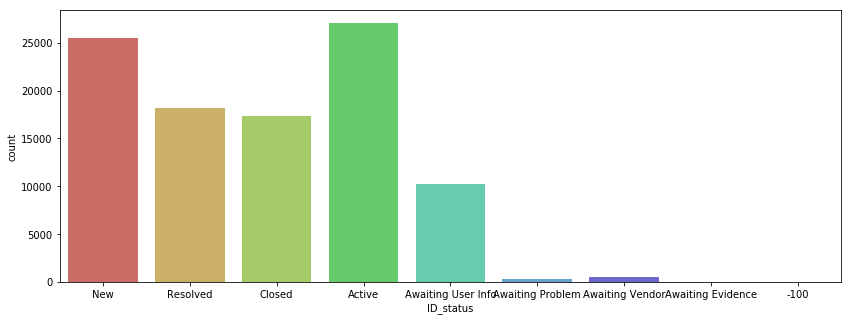

In [7]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.countplot(x="ID_status", data=train, palette="hls")
train['ID_status'].value_counts()

True     81810
False    17388
Name: active, dtype: int64

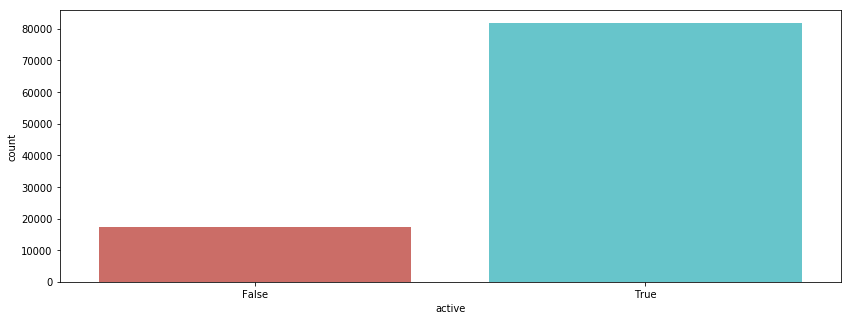

In [8]:
sns.countplot(x="active", data=train, palette="hls")
train['active'].value_counts()

0    48853
1    26027
2    10503
3     5777
4     3244
Name: count_reassign, dtype: int64

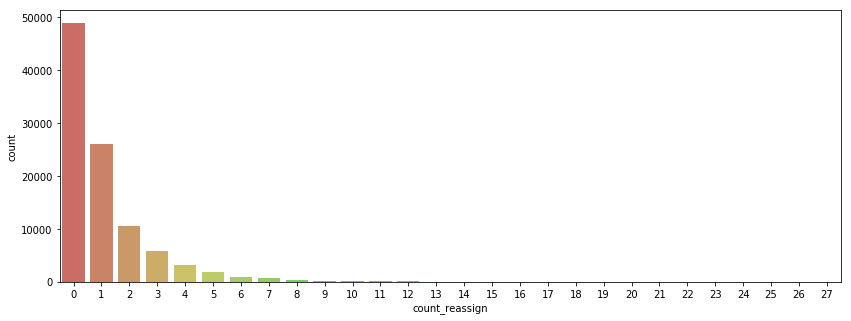

In [15]:
sns.countplot(x="count_reassign", data=train, palette="hls")
train['count_reassign'].value_counts().head()        #taking first 10 for model building and remaing we replace as mode

0    97571
1     1340
2      134
3       77
4       41
6       14
5       13
7        5
8        3
Name: count_opening, dtype: int64

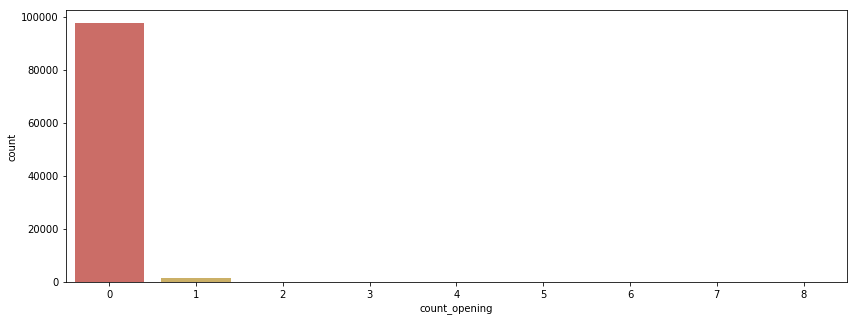

In [10]:
sns.countplot(x="count_opening", data=train, palette="hls")
train['count_opening'].value_counts()

In [11]:
train['count_updated'].value_counts().head()

0    17361
1    15502
2    13851
3     9919
4     7546
Name: count_updated, dtype: int64

In [12]:
train['ID_caller'].value_counts().head()

Caller 1904    1001
Caller 290      552
Caller 4514     496
Caller 1441     218
Caller 298      203
Name: ID_caller, dtype: int64

In [13]:
train['opened_by'].value_counts().head()

Opened by  17     29027
Opened by  24      5658
Opened by  131     5113
Opened by  108     4234
Opened by  55      3917
Name: opened_by, dtype: int64

In [16]:
train['opened_time'].value_counts().head()
#train.opened_time.head(6)

07-03-2016 11:04    43
14-04-2016 20:42    41
04-07-2016 14:38    41
07-03-2016 09:25    39
07-03-2016 09:11    38
Name: opened_time, dtype: int64

In [17]:
train['Created_by'].value_counts().head()
#train.Created_by.head(10)

?                37174
Created by 10    16968
Created by 13     3146
Created by 62     2790
Created by 52     2457
Name: Created_by, dtype: int64

In [18]:
train['created_at'].value_counts().head()

?                   37174
04-07-2016 14:50       41
15-03-2016 15:19       38
19-04-2016 11:32       36
30-03-2016 08:23       33
Name: created_at, dtype: int64

In [19]:
#'updated_by', 'updated_at'
train['updated_by'].value_counts().head()

Updated by 908    25190
Updated by 44      8845
Updated by 60      4951
Updated by 429     2918
Updated by 859     1760
Name: updated_by, dtype: int64

In [20]:
train['updated_at'].value_counts().head()

24-03-2016 18:40    297
24-03-2016 18:51    282
24-03-2016 18:41    279
24-03-2016 19:00    278
24-03-2016 19:01    272
Name: updated_at, dtype: int64

Phone             98306
Self service        714
Email               153
Direct opening       14
IVR                  11
Name: type_contact, dtype: int64

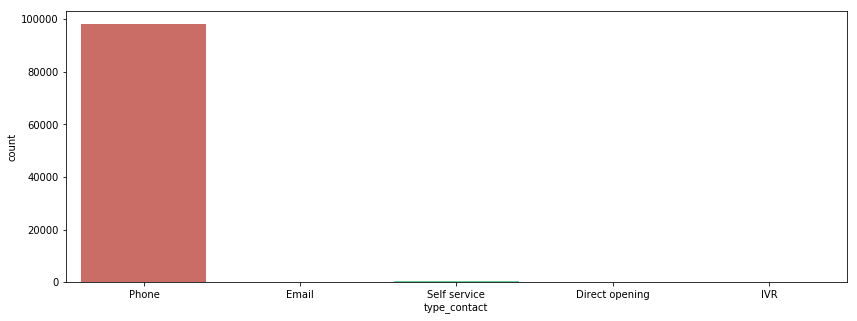

In [21]:
##Categorical attribute that shows by what means the incident was reported
sns.countplot(x="type_contact", data=train, palette="hls")  
train['type_contact'].value_counts()
#train.type_contact.head(6)

In [22]:
#'location', 'category_ID'
train['location'].value_counts().head()

Location 204    22295
Location 161    15867
Location 143    13463
Location 108     8870
Location 93      7980
Name: location, dtype: int64

In [23]:
train['category_ID'].value_counts().head(5)
#type(cat)
#cat = pd.DataFrame(cat)
#cat.info()

Category 26    12937
Category 53    11282
Category 42    11130
Category 46     9268
Category 23     5505
Name: category_ID, dtype: int64

In [24]:
#sns.countplot(x="location", data=train, palette="hls")  
train['user_symptom'].value_counts().head(7)

Symptom 491    36496
?              23139
Symptom 534     3852
Symptom 387     1809
Symptom 4       1794
Symptom 116     1648
Symptom 532     1460
Name: user_symptom, dtype: int64

In [25]:
#sns.countplot(x="location", data=train, palette="hls")  
train['Support_group'].value_counts().head()

Group 70    30357
?            9994
Group 25     5421
Group 24     4717
Group 20     4293
Name: Support_group, dtype: int64

In [26]:
#sns.countplot(x="location", data=train, palette="hls")  
train['support_incharge'].value_counts().head()

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
Name: support_incharge, dtype: int64

False    81382
True     17816
Name: Doc_knowledge, dtype: int64

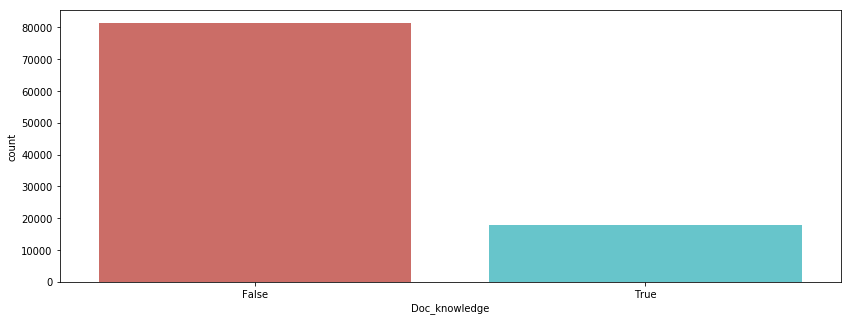

In [27]:
#Boolean attribute that shows whether a knowledge base document was used to resolve the incident
sns.countplot(x="Doc_knowledge", data=train, palette="hls")  
train['Doc_knowledge'].value_counts()

False    70526
True     28672
Name: confirmation_check, dtype: int64

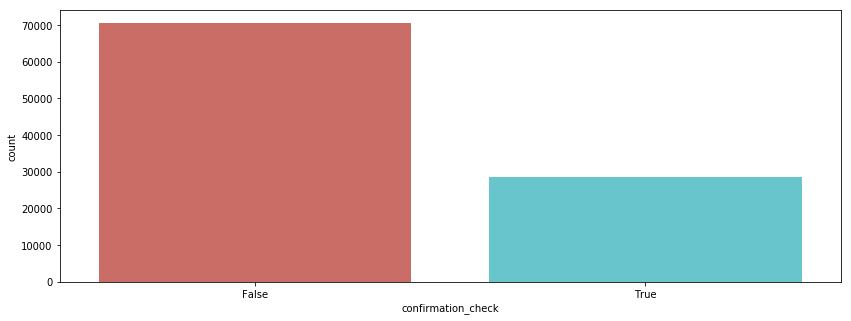

In [28]:
#Boolean attribute that shows whether the priority field has been double-checked
sns.countplot(x="confirmation_check", data=train, palette="hls")  
train['confirmation_check'].value_counts()

Do Not Notify    99113
Send Email          85
Name: notify, dtype: int64

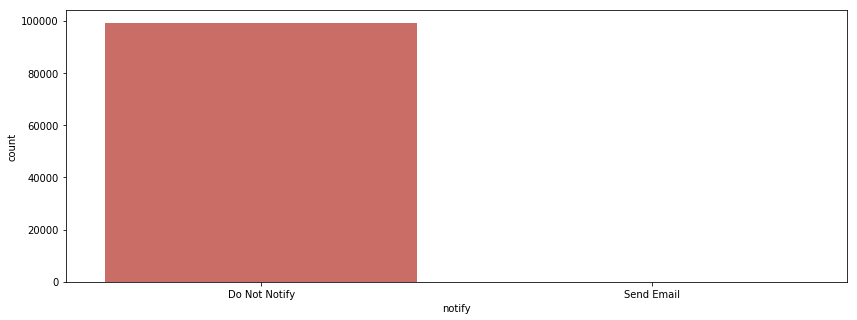

In [29]:
sns.countplot(x="notify", data=train, palette="hls")  
train['notify'].value_counts()

In [30]:
train['problem_ID'].value_counts().head()

?                  97620
Problem ID  14       114
Problem ID  2        112
Problem ID  52        55
Problem ID  239       35
Name: problem_ID, dtype: int64

2 - Medium    94034
3 - Low        2720
1 - High       2444
Name: impact, dtype: int64

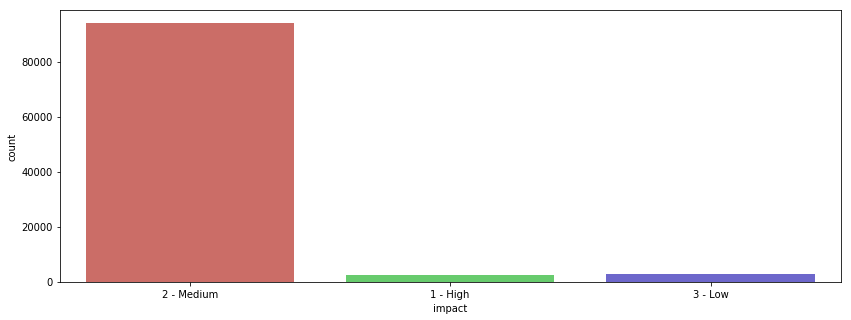

In [31]:
#Description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low)
sns.countplot(x="impact", data=train, palette="hls")  
train['impact'].value_counts()

In [32]:
#identifier of the change request associated with the incident
train['change_request'].value_counts().head()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000342       12
CHG0000047       12
Name: change_request, dtype: int64

# Cleaning 

In [33]:
train.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

## Deleting columns : 'Unnamed: 0', 'ID' , 'problem_ID'